In [1]:
import sys

In [3]:
print(sys.version)

3.12.4 | packaged by Anaconda, Inc. | (main, Jun 18 2024, 15:03:56) [MSC v.1929 64 bit (AMD64)]


In [1]:
import os

In [3]:
os.listdir()

['.ipynb_checkpoints',
 'GUIDE_Test.csv.zip',
 'GUIDE_Train.csv',
 'GUIDE_Train.csv.zip',
 'Microsoft -Classifying Cybersecurity Incidents .pdf',
 'Untitled1.ipynb']

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
data = pd.read_csv('new_train_sample.csv')

In [5]:
test_data = pd.read_csv('GUIDE_Test.csv')

C:\Users\osrnm\AppData\Local\Temp\ipykernel_17232\1889426474.py:1: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  test_data = pd.read_csv('GUIDE_Test.csv')


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4758418 entries, 0 to 4758417
Data columns (total 46 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Unnamed: 0          int64  
 1   Id                  int64  
 2   OrgId               int64  
 3   IncidentId          int64  
 4   AlertId             int64  
 5   Timestamp           object 
 6   DetectorId          int64  
 7   AlertTitle          int64  
 8   Category            object 
 9   MitreTechniques     object 
 10  IncidentGrade       object 
 11  ActionGrouped       object 
 12  ActionGranular      object 
 13  EntityType          object 
 14  EvidenceRole        object 
 15  DeviceId            int64  
 16  Sha256              int64  
 17  IpAddress           int64  
 18  Url                 int64  
 19  AccountSid          int64  
 20  AccountUpn          int64  
 21  AccountObjectId     int64  
 22  AccountName         int64  
 23  DeviceName          int64  
 24  NetworkMessageId    int6

In [9]:
data.head()

,Unnamed: 0,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,...,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City
0,5172780,1709396985476,26,18583,687462,2024-06-06T05:56:47.000Z,31,813,Malware,NaN,...,NaN,NaN,5,66,NaN,Suspicious,Malicious,242,1445,10630
1,8470561,927712939180,33,5065,3990,2024-06-03T10:45:09.000Z,38,25,Impact,NaN,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
2,5897583,1090921697002,201,150787,807590,2024-06-13T03:36:40.000Z,419,444,Execution,T1047;T1059;T1053;T1569;T1059.001;T1053.002;T1...,...,NaN,Destination,5,66,NaN,NaN,NaN,242,1445,10630
3,3288552,1434519079555,204,108287,28575,2024-06-08T16:54:57.000Z,44,1233,SuspiciousActivity,NaN,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
4,4060961,1005022347708,54,528202,1458226,2024-06-09T02:48:01.000Z,102,58829,Exfiltration,NaN,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630


In [11]:
data.isnull().sum()

Unnamed: 0                  0
Id                          0
OrgId                       0
IncidentId                  0
AlertId                     0
Timestamp                   0
DetectorId                  0
AlertTitle                  0
Category                    0
MitreTechniques       2733136
IncidentGrade           25775
ActionGrouped         4730205
ActionGranular        4730205
EntityType                  0
EvidenceRole                0
DeviceId                    0
Sha256                      0
IpAddress                   0
Url                         0
AccountSid                  0
AccountUpn                  0
AccountObjectId             0
AccountName                 0
DeviceName                  0
NetworkMessageId            0
EmailClusterId        4710241
RegistryKey                 0
RegistryValueName           0
RegistryValueData           0
ApplicationId               0
ApplicationName             0
OAuthApplicationId          0
ThreatFamily          4721038
FileName  

In [11]:
data['MitreTechniques'].unique()

array([nan,
       'T1047;T1059;T1053;T1569;T1059.001;T1053.002;T1053.005;T1569.002',
       'T1078;T1078.004', ..., 'T1090;T1572', 'T1556;T1098',
       'T1021;T1021.002;T1074.002;T1078;T1078.002;T1080;T1570'],
      dtype=object)

In [13]:
data['ActionGrouped'].unique()

array([nan, 'ContainAccount', 'IsolateDevice', 'Stop Virtual Machines'],
      dtype=object)

In [15]:
data['ActionGranular'].unique()

array([nan, 'account password changed', 'change user password.',
       'account disabled', 'update stsrefreshtokenvalidfrom timestamp.',
       'isolateresponse', 'reset user password.', 'disable account.',
       'delete user.', 'disableuser', 'forcepasswordresetremediation',
       'quarantinefile', 'msecidentitiessuspenduser',
       'msecidentitiesconfirmusercompromised', 'delete virtualmachines',
       'account deleted', 'set force change user password.'], dtype=object)

In [17]:
data['EmailClusterId'].unique()

array([           nan, 3.97075715e+09, 2.90170224e+09, ...,
       3.83569052e+09, 4.29155544e+09, 4.06138474e+09])

In [19]:
data['ThreatFamily'].unique()

array(['Casdet', nan, 'LazyStealer', ..., 'CVE-2017-8570', 'Doki',
       'StealC'], dtype=object)

In [21]:
data['ResourceType'].unique()

array([nan, 'Virtual Machine', 'Key Vault', 'Azure Resource',
       'Azure Database for MySQL Server', 'Storage Account',
       'App Service', 'Azure Arc machine',
       'Azure Database for PostgreSQL Server',
       'Virtual Machine Scale Set', 'SQL Database',
       'Azure Cosmos DB Account', 'Subscription',
       'API Management Service', 'Networking', 'SQL Server',
       'Key Vault Secret', 'GCP Compute Instance',
       'Key Vault Certificate', 'Kubernetes Service', 'Synapse SQL Pool',
       'AWS EC2 Instance', 'Synapse Workspace', 'SQL Managed Instance',
       'Key Vault Key'], dtype=object)

In [23]:
data['Roles'].unique()

array([nan, 'Destination', 'Contextual', 'Attacker', 'Suspicious',
       'Compromised', 'Source', 'PolicyViolator', 'Attacked', 'Edited'],
      dtype=object)

In [25]:
data['AntispamDirection'].unique()

array([nan, 'Inbound', 'Intraorg', 'Outbound',
       'DomainPII_50d8b4a941c26b89482c94ab324b5a274f9ced66',
       'DomainPII_df80ab894e01e375bf55d12ba315c04029d3e32d'], dtype=object)

In [27]:
data['SuspicionLevel'].unique()

array(['Suspicious', nan, 'Incriminated'], dtype=object)

In [29]:
data['LastVerdict'].unique()

array(['Malicious', nan, 'Suspicious', 'NoThreatsFound',
       'DomainPII_50d8b4a941c26b89482c94ab324b5a274f9ced66',
       'DomainPII_9207384283ce115db5a590dd9ca5de21e5e99df2'], dtype=object)

In [7]:
data = data.drop(['Unnamed: 0', 'EmailClusterId', 'ThreatFamily','ResourceType','Roles', 'AntispamDirection'],axis=1)

In [14]:
data

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,...,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,SuspicionLevel,LastVerdict,CountryCode,State,City
0,1709396985476,26,18583,687462,2024-06-06T05:56:47.000Z,31,813,Malware,NaN,BenignPositive,...,4132,4227,3586,5,66,Suspicious,Malicious,242,1445,10630
1,927712939180,33,5065,3990,2024-06-03T10:45:09.000Z,38,25,Impact,NaN,BenignPositive,...,289573,117668,3586,5,66,NaN,NaN,242,1445,10630
2,1090921697002,201,150787,807590,2024-06-13T03:36:40.000Z,419,444,Execution,T1047;T1059;T1053;T1569;T1059.001;T1053.002;T1...,BenignPositive,...,289573,117668,3586,5,66,NaN,NaN,242,1445,10630
3,1434519079555,204,108287,28575,2024-06-08T16:54:57.000Z,44,1233,SuspiciousActivity,NaN,TruePositive,...,97007,9177,3586,5,66,Suspicious,Suspicious,242,1445,10630
4,1005022347708,54,528202,1458226,2024-06-09T02:48:01.000Z,102,58829,Exfiltration,NaN,BenignPositive,...,39978,114449,3586,5,66,NaN,NaN,242,1445,10630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4758413,103079215470,142,93987,15739,2024-06-10T10:25:17.000Z,112,7836,Exfiltration,NaN,FalsePositive,...,289573,117668,3586,5,66,NaN,NaN,242,1445,10630
4758414,1683627184337,36,1001,257479,2024-06-11T19:30:52.000Z,2,2,CommandAndControl,NaN,FalsePositive,...,289573,117668,3586,5,66,Suspicious,Suspicious,242,1445,10630
4758415,1597727836318,851,31194,1518250,2024-06-09T04:27:41.000Z,1,1,InitialAccess,T1566.002,BenignPositive,...,289573,117668,3586,5,66,NaN,NaN,242,1445,10630
4758416,137438957239,12,2419,1203,2024-05-21T23:01:11.000Z,16,1334,Impact,NaN,BenignPositive,...,289573,117668,3586,5,66,NaN,NaN,242,1445,10630


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4758418 entries, 0 to 4758417
Data columns (total 40 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   Id                  int64 
 1   OrgId               int64 
 2   IncidentId          int64 
 3   AlertId             int64 
 4   Timestamp           object
 5   DetectorId          int64 
 6   AlertTitle          int64 
 7   Category            object
 8   MitreTechniques     object
 9   IncidentGrade       object
 10  ActionGrouped       object
 11  ActionGranular      object
 12  EntityType          object
 13  EvidenceRole        object
 14  DeviceId            int64 
 15  Sha256              int64 
 16  IpAddress           int64 
 17  Url                 int64 
 18  AccountSid          int64 
 19  AccountUpn          int64 
 20  AccountObjectId     int64 
 21  AccountName         int64 
 22  DeviceName          int64 
 23  NetworkMessageId    int64 
 24  RegistryKey         int64 
 25  RegistryValueName 

In [19]:
data.isnull().sum()

Id                          0
OrgId                       0
IncidentId                  0
AlertId                     0
Timestamp                   0
DetectorId                  0
AlertTitle                  0
Category                    0
MitreTechniques       2733136
IncidentGrade           25775
ActionGrouped         4730205
ActionGranular        4730205
EntityType                  0
EvidenceRole                0
DeviceId                    0
Sha256                      0
IpAddress                   0
Url                         0
AccountSid                  0
AccountUpn                  0
AccountObjectId             0
AccountName                 0
DeviceName                  0
NetworkMessageId            0
RegistryKey                 0
RegistryValueName           0
RegistryValueData           0
ApplicationId               0
ApplicationName             0
OAuthApplicationId          0
FileName                    0
FolderPath                  0
ResourceIdName              0
OSFamily  

In [9]:
train_data = data.drop(["MitreTechniques","ActionGrouped","ActionGranular","SuspicionLevel","LastVerdict"], axis = 1)

In [41]:
missing_values = train_data.isnull().sum()
missing_values[missing_values > 0]

IncidentGrade    25775
dtype: int64

In [43]:
train_data.shape

(4758418, 35)

In [11]:
train_data = train_data.dropna()

In [47]:
train_data.shape

(4732643, 35)

In [23]:
for col in train_data.columns:
    print('Unique values of ' + col)
    print(train_data[col].unique())
    print("---------------------------------------------------------")

Unique values of Id
[1709396985476  927712939180 1090921697002 ... 1511828493061 1408749273700
 1168231108101]
---------------------------------------------------------
Unique values of OrgId
[  26   33  201 ... 5515 5354 3909]
---------------------------------------------------------
Unique values of IncidentId
[ 18583   5065 150787 ... 502875 580652 207395]
---------------------------------------------------------
Unique values of AlertId
[ 687462    3990  807590 ... 1709125  266048  588370]
---------------------------------------------------------
Unique values of Timestamp
['2024-06-06T05:56:47.000Z' '2024-06-03T10:45:09.000Z'
 '2024-06-13T03:36:40.000Z' ... '2024-06-13T13:11:53.000Z'
 '2024-06-12T02:59:37.000Z' '2024-06-12T14:13:26.000Z']
---------------------------------------------------------
Unique values of DetectorId
[  31   38  419 ... 5373 8644 4960]
---------------------------------------------------------
Unique values of AlertTitle
[   813     25    444 ...  61768  6243

In [13]:
train_data['Timestamp']

0          2024-06-06T05:56:47.000Z
1          2024-06-03T10:45:09.000Z
2          2024-06-13T03:36:40.000Z
3          2024-06-08T16:54:57.000Z
4          2024-06-09T02:48:01.000Z
                     ...           
4758413    2024-06-10T10:25:17.000Z
4758414    2024-06-11T19:30:52.000Z
4758415    2024-06-09T04:27:41.000Z
4758416    2024-05-21T23:01:11.000Z
4758417    2024-06-13T12:08:30.000Z
Name: Timestamp, Length: 4732643, dtype: object

In [15]:
train_data['Timestamp'] = pd.to_datetime(train_data['Timestamp'])

In [16]:
train_data['Timestamp']

0         2024-06-06 05:56:47+00:00
1         2024-06-03 10:45:09+00:00
2         2024-06-13 03:36:40+00:00
3         2024-06-08 16:54:57+00:00
4         2024-06-09 02:48:01+00:00
                     ...           
4758413   2024-06-10 10:25:17+00:00
4758414   2024-06-11 19:30:52+00:00
4758415   2024-06-09 04:27:41+00:00
4758416   2024-05-21 23:01:11+00:00
4758417   2024-06-13 12:08:30+00:00
Name: Timestamp, Length: 4732643, dtype: datetime64[ns, UTC]

In [19]:
train_data.groupby(train_data['Timestamp'].dt.date).size()

Timestamp
2023-11-20         1
2023-11-22         2
2023-11-23         1
2023-11-27         1
2023-12-02         1
               ...  
2024-06-13    328811
2024-06-14    232029
2024-06-15     87898
2024-06-16     72623
2024-06-17     20759
Length: 166, dtype: int64

In [35]:
incident_trend = train_data.groupby(train_data['Timestamp'].dt.date).size()

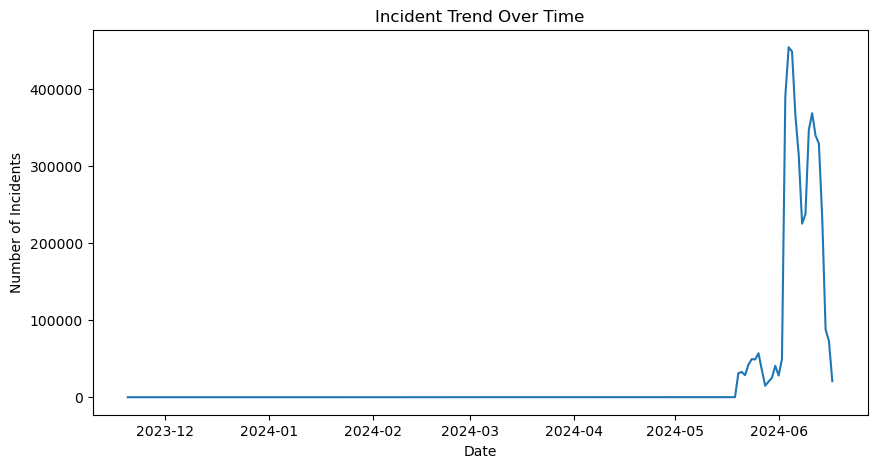

In [37]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=incident_trend.index, y=incident_trend.values)
plt.title('Incident Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Incidents')
plt.show()

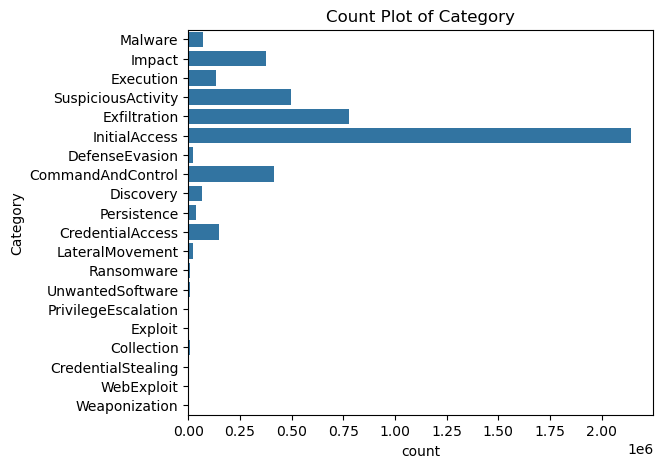

In [37]:
plt.figure(figsize = (6,5))
sns.countplot(y='Category', data=train_data)
plt.title('Count Plot of Category')
plt.show()

In [63]:
train_data['IncidentGrade'].size

4732643

In [65]:
import psutil

In [67]:
psutil.virtual_memory().available / (1024 ** 3)

1.5510292053222656

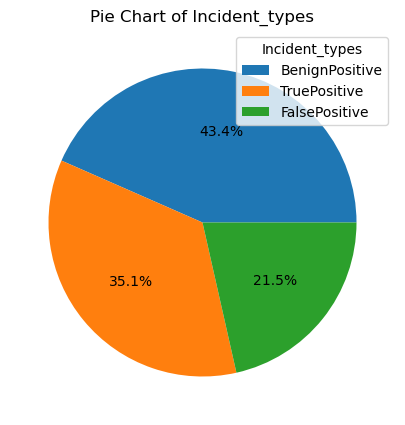

In [39]:
Incident_types = train_data['IncidentGrade'].value_counts().index
IncidentGrade_counts = train_data['IncidentGrade'].value_counts().values

plt.figure(figsize=(15,5))
plt.pie(IncidentGrade_counts, autopct ='%1.1f%%')
plt.legend(title = "Incident_types", labels = Incident_types)
plt.title('Pie Chart of Incident_types')
plt.show()

C:\Users\osrnm\AppData\Local\Temp\ipykernel_18872\4064004240.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='EvidenceRole', data = train_data, palette = 'bright' )


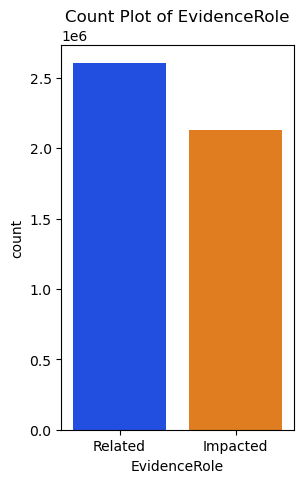

In [41]:
plt.figure(figsize = (3,5))
sns.countplot(x='EvidenceRole', data = train_data, palette = 'bright' )
plt.title('Count Plot of EvidenceRole')
plt.show()

In [43]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4732643 entries, 0 to 4758417
Data columns (total 35 columns):
 #   Column              Dtype              
---  ------              -----              
 0   Id                  int64              
 1   OrgId               int64              
 2   IncidentId          int64              
 3   AlertId             int64              
 4   Timestamp           datetime64[ns, UTC]
 5   DetectorId          int64              
 6   AlertTitle          int64              
 7   Category            object             
 8   IncidentGrade       object             
 9   EntityType          object             
 10  EvidenceRole        object             
 11  DeviceId            int64              
 12  Sha256              int64              
 13  IpAddress           int64              
 14  Url                 int64              
 15  AccountSid          int64              
 16  AccountUpn          int64              
 17  AccountObjectId     int64       

In [45]:
corr_data = train_data.select_dtypes(include=['int64']).corr()

In [79]:
corr_data

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,DeviceId,Sha256,IpAddress,Url,...,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City
Id,1.000000,0.006345,0.014638,0.009372,0.002111,0.008864,0.003090,0.002787,0.012637,-0.009493,...,-0.003055,-0.001906,0.002031,0.001312,-0.003255,0.002300,0.002374,0.013294,0.010789,0.010935
OrgId,0.006345,1.000000,0.018956,0.151069,0.150901,-0.005408,0.008631,0.000643,0.115009,0.008749,...,-0.060197,-0.042992,0.009299,0.024345,-0.011382,-0.009608,-0.010038,0.023365,0.022825,0.025214
IncidentId,0.014638,0.018956,1.000000,0.409812,0.040822,0.103906,-0.038258,-0.028788,0.132408,-0.026058,...,-0.180941,-0.006669,-0.020332,-0.001698,-0.013495,-0.046070,-0.045868,0.046947,0.041265,0.042837
AlertId,0.009372,0.151069,0.409812,1.000000,0.124817,0.146009,-0.059201,0.004048,0.082467,0.064180,...,-0.147153,-0.028717,0.042280,0.048873,-0.009097,-0.075054,-0.075334,-0.160549,-0.155951,-0.154729
DetectorId,0.002111,0.150901,0.040822,0.124817,1.000000,0.238609,-0.031760,-0.025108,0.039842,0.040067,...,0.007772,-0.026506,-0.045649,-0.062801,-0.035449,-0.005263,-0.005610,0.069452,0.063531,0.063208
AlertTitle,0.008864,-0.005408,0.103906,0.146009,0.238609,1.000000,0.011683,0.007397,0.082416,0.059706,...,-0.009136,-0.002565,-0.040794,-0.087083,0.003209,0.011139,0.010974,0.074095,0.067638,0.067549
DeviceId,0.003090,0.008631,-0.038258,-0.059201,-0.031760,0.011683,1.000000,-0.054000,-0.101918,-0.051537,...,-0.029434,-0.003015,-0.064422,-0.059975,0.004096,0.684388,0.685006,-0.056054,-0.051182,-0.051128
Sha256,0.002787,0.000643,-0.028788,0.004048,-0.025108,0.007397,-0.054000,1.000000,-0.149891,-0.075765,...,-0.043289,-0.004434,0.863830,0.750194,-0.007928,-0.040592,-0.040621,-0.082439,-0.075273,-0.075194
IpAddress,0.012637,0.115009,0.132408,0.082467,0.039842,0.082416,-0.101918,-0.149891,1.000000,-0.143055,...,-0.081703,-0.008369,-0.178820,-0.166477,-0.014963,-0.076612,-0.076667,0.519493,0.483340,0.484958
Url,-0.009493,0.008749,-0.026058,0.064180,0.040067,0.059706,-0.051537,-0.075765,-0.143055,1.000000,...,-0.041315,-0.004232,-0.090425,-0.084183,-0.007566,-0.038741,-0.038769,-0.078679,-0.071840,-0.071764


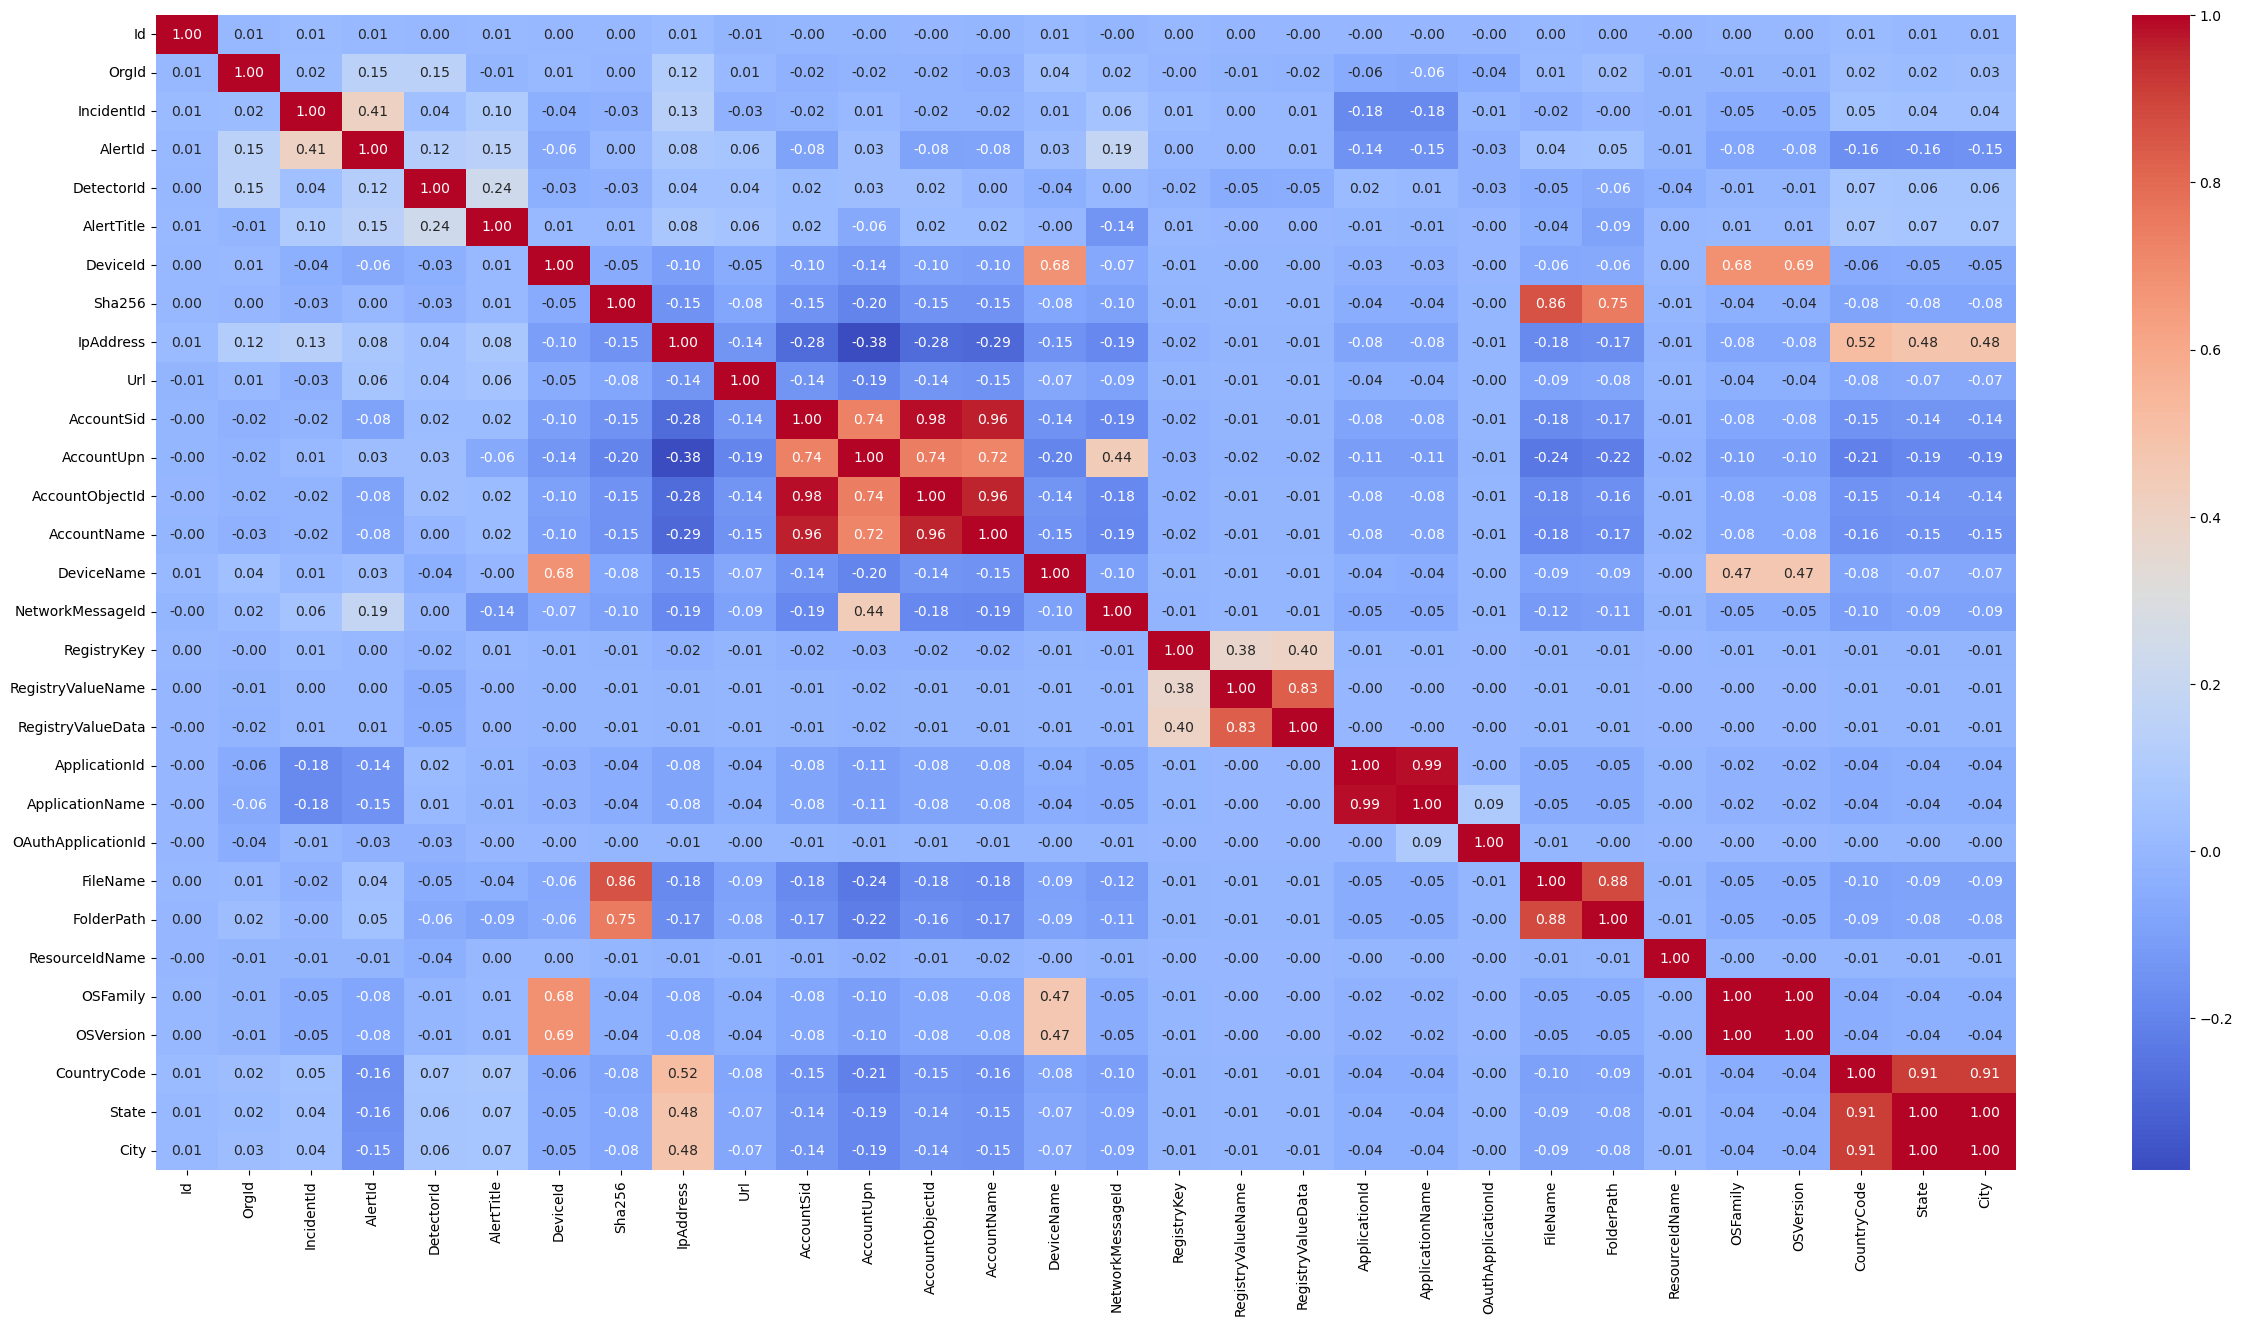

In [81]:
plt.figure(figsize=(30, 15))
sns.heatmap(corr_data, fmt=".2f", annot= True, cmap= "coolwarm")
plt.show()

In [21]:
train_data = train_data.drop(['Timestamp', 'DeviceId', 'Sha256', 'AccountSid', 'AccountUpn', 'AccountName',  
                        'RegistryValueName', 'ApplicationId', 'FolderPath','OSVersion', 'State', 'City'], axis = 1)

In [23]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4732643 entries, 0 to 4758417
Data columns (total 23 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   Id                  int64 
 1   OrgId               int64 
 2   IncidentId          int64 
 3   AlertId             int64 
 4   DetectorId          int64 
 5   AlertTitle          int64 
 6   Category            object
 7   IncidentGrade       object
 8   EntityType          object
 9   EvidenceRole        object
 10  IpAddress           int64 
 11  Url                 int64 
 12  AccountObjectId     int64 
 13  DeviceName          int64 
 14  NetworkMessageId    int64 
 15  RegistryKey         int64 
 16  RegistryValueData   int64 
 17  ApplicationName     int64 
 18  OAuthApplicationId  int64 
 19  FileName            int64 
 20  ResourceIdName      int64 
 21  OSFamily            int64 
 22  CountryCode         int64 
dtypes: int64(19), object(4)
memory usage: 866.6+ MB


In [25]:
train_data.to_csv('train_data.csv')

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, classification_report

In [29]:
columns = train_data.columns
test_data = test_data[columns]

In [31]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4147992 entries, 0 to 4147991
Data columns (total 23 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   Id                  int64 
 1   OrgId               int64 
 2   IncidentId          int64 
 3   AlertId             int64 
 4   DetectorId          int64 
 5   AlertTitle          int64 
 6   Category            object
 7   IncidentGrade       object
 8   EntityType          object
 9   EvidenceRole        object
 10  IpAddress           int64 
 11  Url                 int64 
 12  AccountObjectId     int64 
 13  DeviceName          int64 
 14  NetworkMessageId    int64 
 15  RegistryKey         int64 
 16  RegistryValueData   int64 
 17  ApplicationName     int64 
 18  OAuthApplicationId  int64 
 19  FileName            int64 
 20  ResourceIdName      int64 
 21  OSFamily            int64 
 22  CountryCode         int64 
dtypes: int64(19), object(4)
memory usage: 727.9+ MB


In [33]:
test_data.to_csv('test_data.csv')

In [35]:
le = LabelEncoder()
for i in train_data.select_dtypes(include = 'object').columns:
    train_data[i] = le.fit_transform(train_data[i])

In [37]:
for i in test_data.select_dtypes(include = 'object').columns:
    test_data[i] = le.fit_transform(test_data[i])

In [39]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4732643 entries, 0 to 4758417
Data columns (total 23 columns):
 #   Column              Dtype
---  ------              -----
 0   Id                  int64
 1   OrgId               int64
 2   IncidentId          int64
 3   AlertId             int64
 4   DetectorId          int64
 5   AlertTitle          int64
 6   Category            int32
 7   IncidentGrade       int32
 8   EntityType          int32
 9   EvidenceRole        int32
 10  IpAddress           int64
 11  Url                 int64
 12  AccountObjectId     int64
 13  DeviceName          int64
 14  NetworkMessageId    int64
 15  RegistryKey         int64
 16  RegistryValueData   int64
 17  ApplicationName     int64
 18  OAuthApplicationId  int64
 19  FileName            int64
 20  ResourceIdName      int64
 21  OSFamily            int64
 22  CountryCode         int64
dtypes: int32(4), int64(19)
memory usage: 794.4 MB


In [115]:
train_data

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,...,DeviceName,NetworkMessageId,RegistryKey,RegistryValueData,ApplicationName,OAuthApplicationId,FileName,ResourceIdName,OSFamily,CountryCode
0,1709396985476,26,18583,687462,31,813,12,0,9,1,...,153085,529644,1631,860,3421,881,4132,3586,5,242
1,927712939180,33,5065,3990,38,25,9,0,17,0,...,3142,529644,1631,860,3421,881,289573,3586,5,242
2,1090921697002,201,150787,807590,419,444,6,0,17,0,...,4181,529644,1631,860,3421,881,289573,3586,5,242
3,1434519079555,204,108287,28575,44,1233,16,2,9,1,...,153085,529644,1631,860,3421,881,97007,3586,5,242
4,1005022347708,54,528202,1458226,102,58829,7,0,9,0,...,153085,529644,1631,860,3421,881,39978,3586,5,242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4758413,103079215470,142,93987,15739,112,7836,7,1,19,0,...,153085,869,1631,860,3421,881,289573,3586,5,242
4758414,1683627184337,36,1001,257479,2,2,1,1,30,0,...,153085,529644,1631,860,3421,881,289573,3586,5,242
4758415,1597727836318,851,31194,1518250,1,1,10,0,19,1,...,153085,402271,1631,860,3421,881,289573,3586,5,242
4758416,137438957239,12,2419,1203,16,1334,9,0,13,1,...,153085,529644,1631,860,3421,881,289573,3586,5,242


In [41]:
train_data.to_csv('train_encoded.csv')

In [43]:
test_data.to_csv('test_encoded.csv')

In [5]:
train_data = pd.read_csv('train_encoded.csv')

In [7]:
test_data = pd.read_csv('test_encoded.csv')